# Tesla Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('tesla.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [2]:
df=pd.DataFrame(data,columns=['Date','Close'])
df.head()

,Date,Close
0,6/29/2010,23.889999
1,6/30/2010,23.830000
2,7/1/2010,21.959999
3,7/2/2010,19.200001
4,7/6/2010,16.110001


In [3]:
df.isna().values.any()

False

In [4]:
data.shape

(1692, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


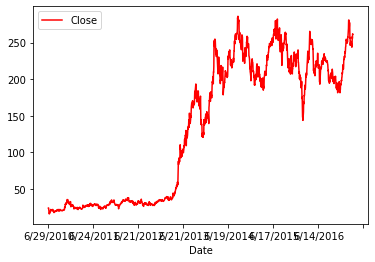

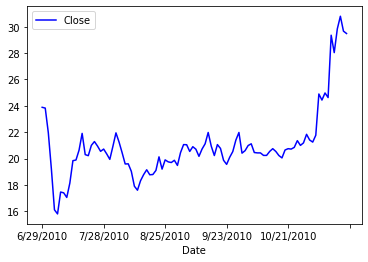

In [7]:
plt.rcParams['figure.figsize']=(18,6)
data.plot('Date','Close',color='red')
new_data=data.head(100)
new_data.plot('Date','Close',color='blue')
plt.show()

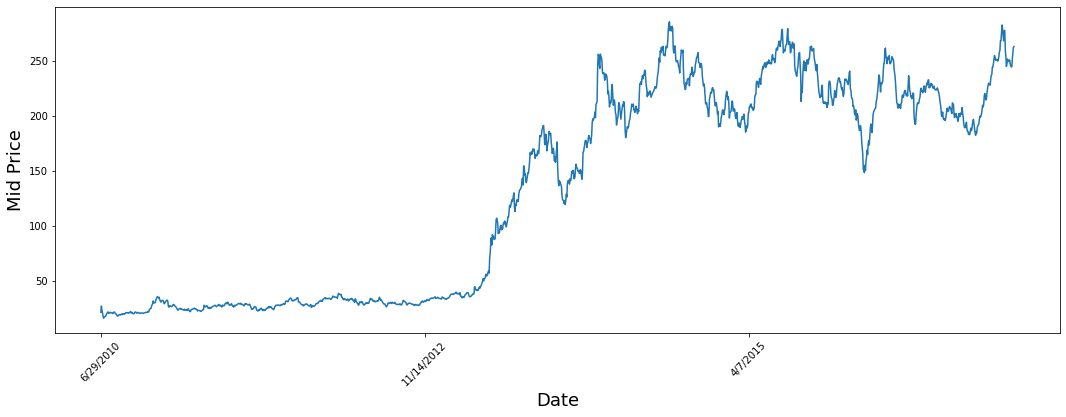

In [8]:
plt.rcParams['figure.figsize']=(18,6)
plt.plot(range(data.shape[0]),(data['High']+data['Low'])/2.0)
plt.xticks(range(0,data.shape[0],600),data['Date'].loc[::600],rotation=45)
plt.xlabel('Date',fontsize='18')
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [11]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
print("Slope",model.coef_)#means with 1 unit increase in the date the closing price increases by 0.17$
print("Intercept",model.intercept_)

Slope [0.17146927]
Intercept -12.924881261445194


In [13]:
pred=model.predict(X_train)
print(pred)

[155.1150001   -9.15255739 203.12639478 ... 270.51381659  82.92643882
 104.36009716]


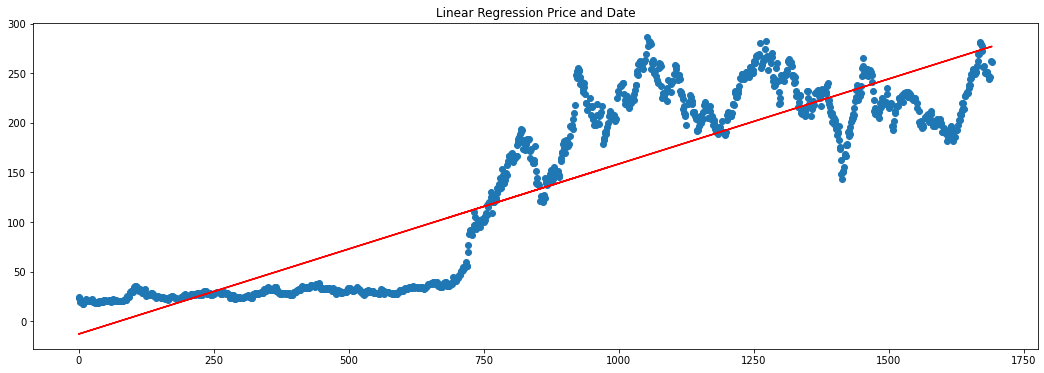

In [14]:
plt.rcParams['figure.figsize']=(18,6)
plt.title('Linear Regression Price and Date')
plt.scatter(X_train,y_train,label='Actual Price')
plt.plot(X_train,pred,color='r',label='Predicted Price')
plt.show()

In [15]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
y_pred = model.predict(X_test)

In [16]:
df.shape

(1692, 2)

In [17]:
df_sample=pd.DataFrame({'Date':test['Date'],'Actual':y_test,'Prediction':y_pred,'Error':(y_test-y_pred)}).head(20)
df_sample

,Date,Actual,Prediction,Error
124,12/23/2010,30.090000,8.337308,21.752692
1688,3/14/2017,258.000000,276.515241,-18.515241
1397,1/15/2016,204.990005,226.617684,-21.627679
6,7/8/2010,17.459999,-11.896066,29.356065
1279,7/29/2015,263.820007,206.384311,57.435696
642,1/16/2013,34.099998,97.158388,-63.058390
229,5/25/2011,28.980000,26.341581,2.638419
446,4/4/2012,35.000000,63.550412,-28.550412
568,9/27/2012,28.490000,84.469662,-55.979662
1110,11/24/2014,246.720001,177.406005,69.313996


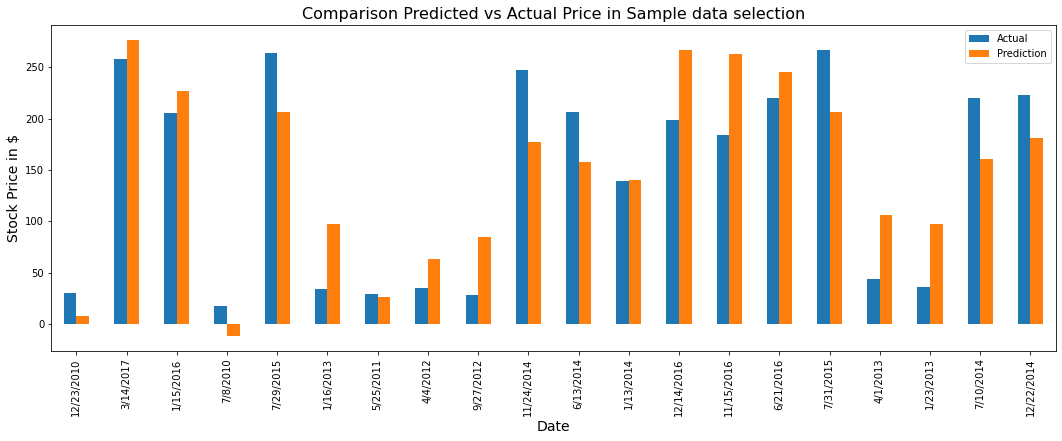

In [18]:
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Actual', 'Prediction'], kind='bar', ax=ax)
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in $', fontsize=14)
plt.show()

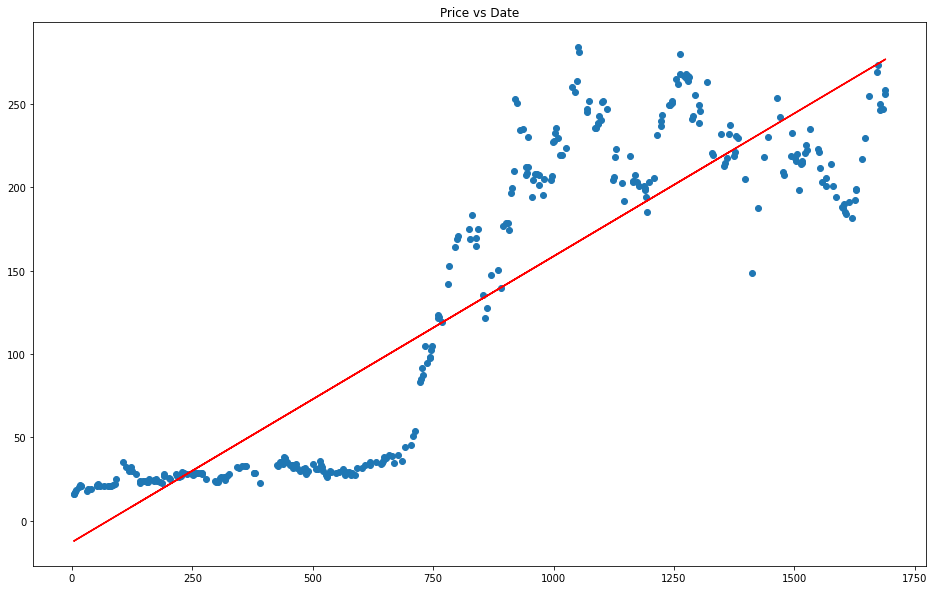

In [19]:
plt.figure(1, figsize=(16,10))
plt.title('Price vs Date')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')

In [20]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.7909527409555444

In [21]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [22]:
pred2=regressor.predict(X_test)
print(pred2)

[ 30.66600053 247.84809752 204.8374959   17.8191999  261.89690295
  33.92870132  27.89749927  36.6916991   28.96760058 244.56489888
 210.40440284 150.18110152 196.13559895 182.6955963  211.03359863
 261.89559405  39.1436993   35.82300007 221.88640014 219.98739589
  22.59159991 121.73619777 193.7551997   27.2925994   34.28610035
 191.99689381  33.38379992  18.75120076 218.3305997  229.1250983
 197.45900301 178.12890187 172.26949677  24.50830013 237.5890988
  28.75020018  27.8597007   32.72940012  32.02760151  32.62500111
  20.59789968  96.54930159 214.84869557  30.27800023  24.64800002
  26.60760069  28.44799993  31.59779994 193.49329507 162.30510074
  33.09799936 280.74420954  30.44930061 203.80079664  28.42819999
 126.33329881 217.53849513 234.28989636 196.67639623  20.40960017
 183.89690345  33.10719914 149.8766035   21.21509961 255.36980215
  20.61500007 207.87079673 251.58870253 247.2108979   33.77220031
 217.42920176 266.78801078  20.83429967 121.02159683 246.33639794
 230.4182993

In [23]:
df_sample2=pd.DataFrame({'Date':test['Date'],'Actual':y_test,'Prediction':pred2,'Error':(y_test-pred2)}).head(20)
df_sample2

,Date,Actual,Prediction,Error
124,12/23/2010,30.090000,30.666001,-0.576001
1688,3/14/2017,258.000000,247.848098,10.151902
1397,1/15/2016,204.990005,204.837496,0.152509
6,7/8/2010,17.459999,17.819200,-0.359201
1279,7/29/2015,263.820007,261.896903,1.923104
642,1/16/2013,34.099998,33.928701,0.171297
229,5/25/2011,28.980000,27.897499,1.082501
446,4/4/2012,35.000000,36.691699,-1.691699
568,9/27/2012,28.490000,28.967601,-0.477601
1110,11/24/2014,246.720001,244.564899,2.155102
